In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
pd.set_option('display.max_columns',None)

In [2]:
train_df=pd.read_csv('Training_manual_cleaned_sh.csv',index_col='application_key')
# from scipy import stats
# z = np.abs(stats.zscore(train_df))
# threshold = 3
# # print(np.where(z > 3))
# train_df=train_df[(z<3).all(axis=1)]
X=train_df.iloc[:,:-1]
Y=train_df.iloc[:,-1]
train_df.head(3)
# (X.shape,Y.shape)
# train_df.columns


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
application_key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
230032,1696.0,1.6541,0.0,0.0,0.0,0.0,6015.0,322.0,40369.000000,18414.0,1780.0,6423.0,3067.0,123875.0,216152.0,1.0,1.0,1.0,3.0,3.0,94.78,8987.180,3700.00,72.25,1462.0,4532.0,2890.0,61.0,4532.0,1095.0,625.0,1.1667,8.0,10.0,4.0,1.0,0.08696,10.0,0.63899,0.0,1.0,156.327000,0.0,0.0
230033,1846.0,0.8095,0.0,0.0,0.0,102.0,7532.0,3171.0,18234.000000,13664.0,1780.0,765.0,1931.0,42613.0,216152.0,0.0,0.0,0.0,0.0,0.0,74.25,953.060,953.06,4.80,1028.0,2099.0,2099.0,30386.0,2281.0,2829.0,169.0,0.4167,8.0,0.0,2.0,0.0,0.00000,13.0,0.63836,1.0,0.0,99.129000,0.0,1.0
230034,1745.0,0.4001,0.0,0.0,0.0,297.0,2536.0,2478.0,34097.436013,2536.0,1780.0,2977.5,4090.0,76109.0,216152.0,0.0,0.0,0.0,0.0,0.0,59.69,3974.425,3700.00,40.44,1472.0,2738.0,2555.0,669.0,4623.0,3772.0,300.0,25.0833,1.0,3.0,1.0,0.0,0.00000,1.0,1.00000,0.0,0.0,127.787452,0.0,1.0


In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
   X ,Y , test_size=0.33, random_state=42)
X_train.shape, Y_train.shape, X_test.shape

((47922, 43), (47922,), (23604, 43))

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

C:\Users\BaadRoR\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\BaadRoR\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [5]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [6]:
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], Y[:offset]
X_test, y_test = X[offset:], Y[offset:]
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 0.1436


Text(0,0.5,'Deviance')

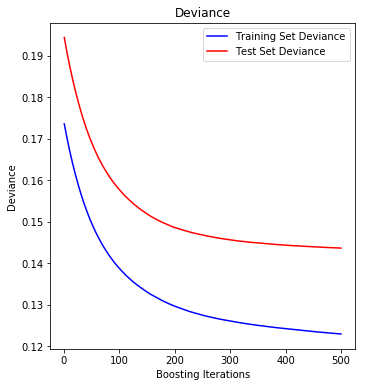

In [7]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

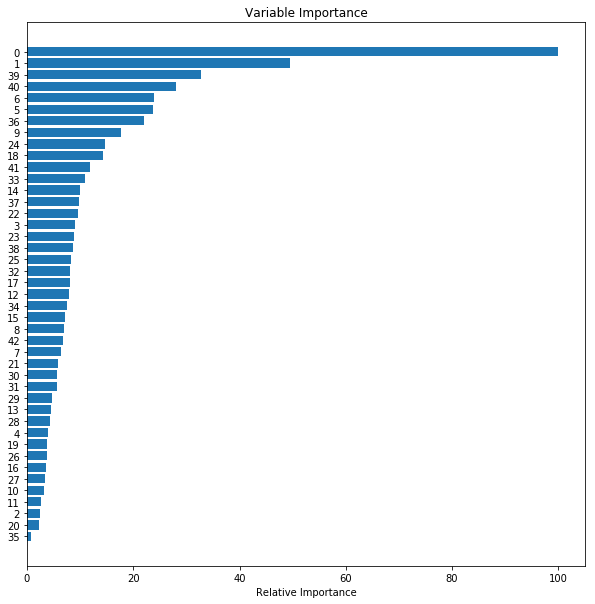

In [8]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(10,10))
ax=plt.subplot(1, 1,1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
fig=plt.figure(figsize=(15,15))
plt.show()

In [ ]:
35, 10, 11, 20, 27,  2, 16,  4, 26, 13, 19, 30, 28, 31,  7, 38, 29,
       21, 32, 42,  8, 15, 12, 34, 17, 25,  3, 23, 22, 14, 37, 33, 24,  9,
       18, 41, 36,  6,  5, 40, 39,  1,  0

In [9]:
sorted_idx

array([35, 20,  2, 11, 10, 27, 16, 26, 19,  4, 28, 13, 29, 31, 30, 21,  7,
       42,  8, 15, 34, 12, 17, 32, 25, 38, 23,  3, 22, 37, 14, 33, 41, 18,
       24,  9, 36,  5,  6, 40, 39,  1,  0], dtype=int64)